In [27]:
import numpy as np 
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn import decomposition

### Getting the Data 

In [28]:
# Exercise 1
iris_data = np.loadtxt("data/irisdata.txt", comments="%")
x = iris_data[0:50, 0:4]

n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")


Number of features: 4 and number of observations: 50


### Explorative Data Analysis

In [29]:
# Exercise 2
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

var_sep_l = sep_l.var(ddof = 1)
var_sep_w = sep_w.var(ddof = 1)
var_pet_l = pet_l.var(ddof = 1)
var_pet_w = pet_w.var(ddof = 1)


In [30]:
# Exercise 3

cov_sep_l_w = 1 / (50 - 1) * np.dot(sep_l, sep_w)
cov_pet_l_w = 1 / (50 - 1) * np.dot(sep_l, pet_l)

print(f"Covariance between width and length of sepals: {cov_sep_l_w}")
print(f"Covariance between lenght of sepals and length of petals: {cov_pet_l_w}")

Covariance between width and length of sepals: 17.61
Covariance between lenght of sepals and length of petals: 7.484489795918367


<Figure size 640x480 with 0 Axes>

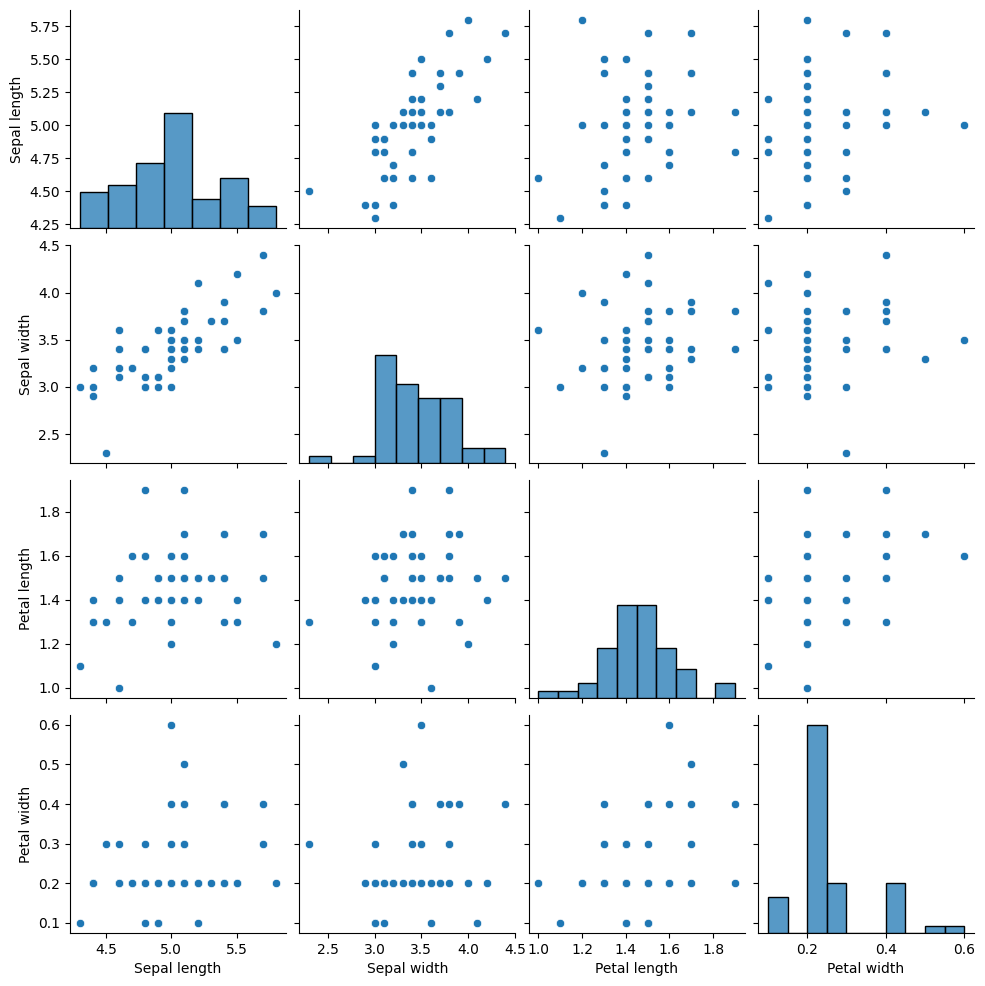

In [31]:
# Exericse 4

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

### PCA Analysis

In [32]:
# Exercise 5
mn = np.mean(x, axis=0)
data = x - mn
c_x = 1 / (50 - 1) * data.T @ data 
print(c_x)
print(np.cov(data.T))

[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


In [33]:
# Exercise 6
values, vectors = np.linalg.eig(c_x)

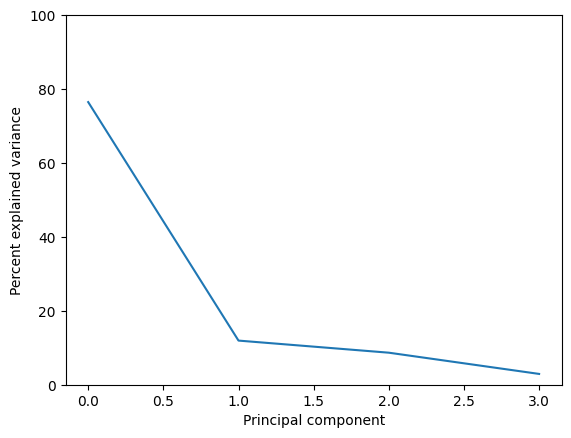

In [34]:
# Exercise 7 
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])
plt.show()

<Figure size 640x480 with 0 Axes>

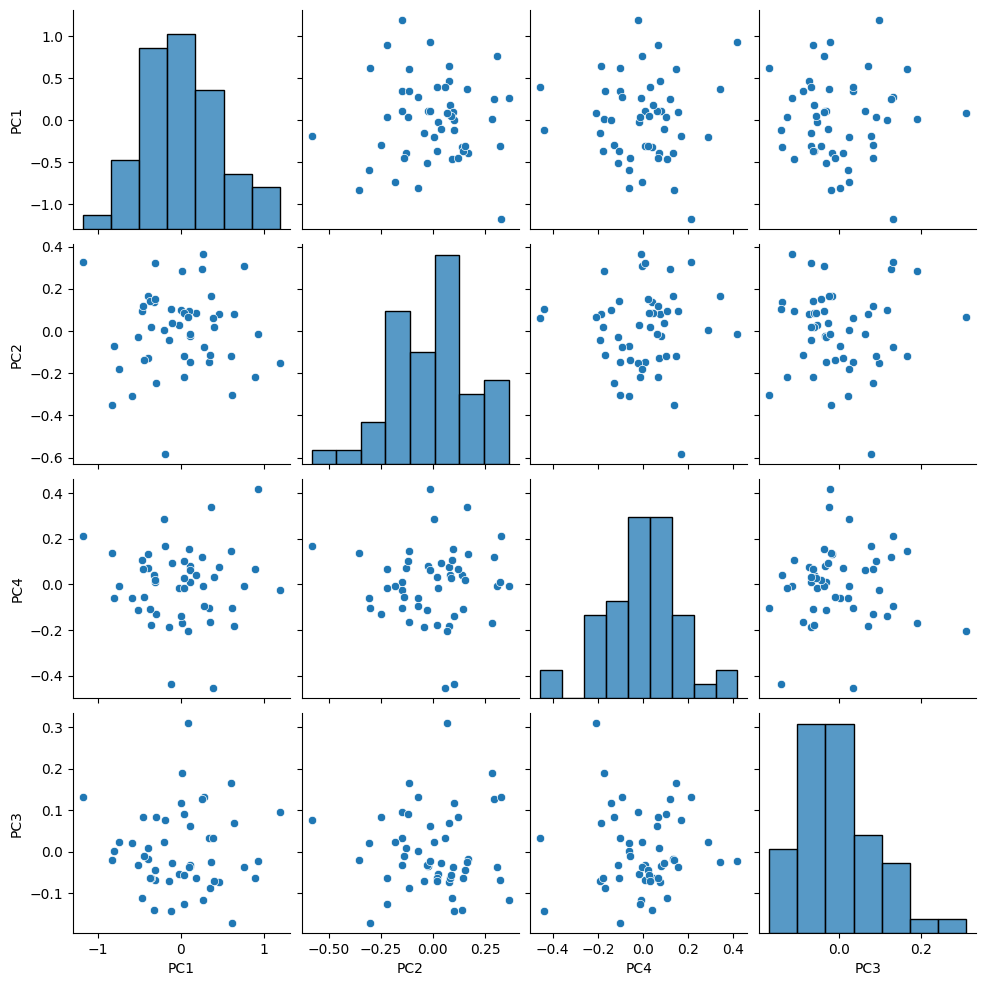

In [35]:
# Exercise 8 
pc_proj = vectors.T.dot(data.T)
plt.figure() 
d = pd.DataFrame(pc_proj.T, columns=['PC1', 'PC2','PC4', 'PC3'])
sns.pairplot(d)
plt.show()

<Figure size 640x480 with 0 Axes>

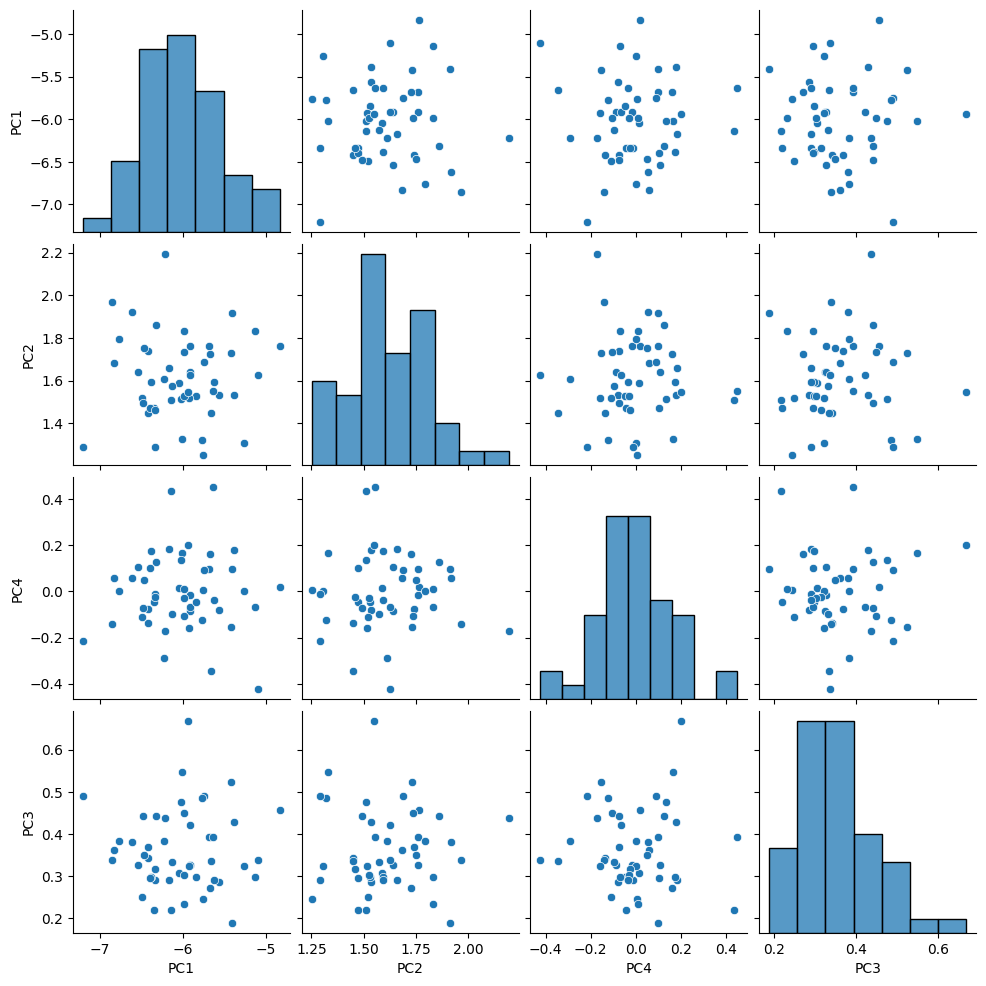

In [36]:
# Exercise 9 
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_
data_transform = pca.transform(data)

plt.figure() 
d = pd.DataFrame(data_transform, columns=['PC1', 'PC2',
'PC4', 'PC3'])
sns.pairplot(d)
plt.show()

In [37]:
print(vectors)
print(vectors_pca)

[[ 0.6690784   0.59788401  0.43996277 -0.03607712]
 [ 0.73414783 -0.62067342 -0.27460747 -0.01955027]
 [ 0.0965439   0.49005559 -0.8324495  -0.23990129]
 [ 0.06356359  0.13093791 -0.19506751  0.96992969]]
[[ 0.6690784   0.73414783  0.0965439   0.06356359]
 [-0.59788401  0.62067342 -0.49005559 -0.13093791]
 [-0.43996277  0.27460747  0.8324495   0.19506751]
 [-0.03607712 -0.01955027 -0.23990129  0.96992969]]
